In [14]:
%%pyspark
df = spark.read.load(path='abfss://finance-data@financedataforproject1.dfs.core.windows.net/transformed-data/Finance_data.csv/part-00000-tid-4114620289772356260-786f0629-35f8-47c5-80f5-d04ab8a99809-17-1-c000.csv', format='csv',header=True)
display(df.limit (10))

StatementMeta(SPARK1, 0, 15, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, 8243140b-8edb-4a2d-ac46-e725a46f5c4f)

In [ ]:
#for original data set
%%pyspark
df = spark.read.load(path='abfss://finance-data@financedataforproject1.dfs.core.windows.net/transformed-data/Original_data.csv/part-00000-tid-685408926525903223-baef8b2a-f6ce-464d-ad98-dfab53630c35-16-1-c000.csv', format='csv',header=True)
display(df.limit (10))

## Using Finance data set(As my Finance dataset and Original dataset both are the same dataset, just has different name)
### Determine the proportion of male vs. female investors

StatementMeta(SPARK1, 0, 6, Finished, Available, Finished)

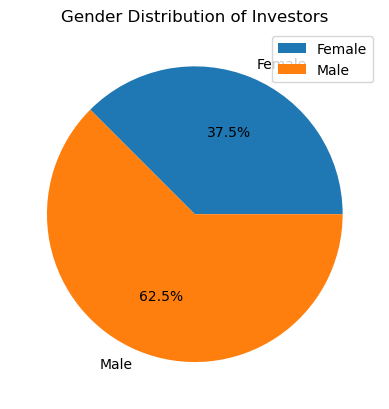

In [5]:
import pandas as pd
import matplotlib.pyplot as plt  # Import matplotlib.pyplot as plt

# Count gender distribution
gender_distribution = df.groupBy("gender").count().toPandas()

# Plotting
gender_distribution.plot(kind='pie', y='count', labels=gender_distribution['gender'], autopct='%1.1f%%')
plt.title('Gender Distribution of Investors')
plt.ylabel('')
plt.show()

### Understand the age demographics of investors base

StatementMeta(SPARK1, 0, 13, Finished, Available, Finished)

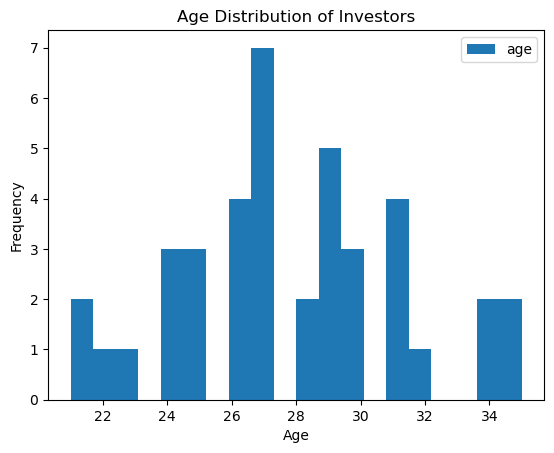

In [12]:
#age_distribution.info() 
age_distribution = df.select("age").toPandas()
age_distribution["age"] = pd.to_numeric(age_distribution["age"], errors='coerce')

# Plotting
age_distribution.plot(kind='hist', bins=20)
plt.title('Age Distribution of Investors')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### Compare the popularity of different investment avenues

In [59]:
import pandas as pd
import numpy as np
import plotly.express as px

investment_avenues = ['Debentures', 'Debentures', 'Gold', 'Gold', 'Government_Bonds', 'Government_Bonds',
                      'Mutual_Funds', 'Mutual_Funds', 'Equity_Market', 'Equity_Market', 'PPF', 'PPF']

data = {
    'Investment_Avenues': investment_avenues * 50,  # 12 entries per type * 50 = 600
    'Number_of_Investors': np.random.randint(50, 1000, 600)  # Random integers between 50 and 1000
}

df = pd.DataFrame(data)

fig = px.violin(df, 
                 y='Number_of_Investors', 
                 x='Investment_Avenues',
                 box=True,       
                 points="all",   
                 color='Investment_Avenues',  
                 hover_data=df.columns,  
                 title='Number of Investors by Investment Avenues')


fig.update_layout(
    yaxis_title='Number of Investors',
    xaxis_title='Investment Avenues',
    template='plotly_white'
)


fig.show()

StatementMeta(SPARK1, 2, 11, Finished, Available, Finished)

### 4. Investment Objectives by Gender Stacked Bar Chart
Description: Show the distribution of investment objectives split by gender.
Example Use: Understand how investment objectives differ between genders.

StatementMeta(SPARK1, 0, 17, Finished, Available, Finished)

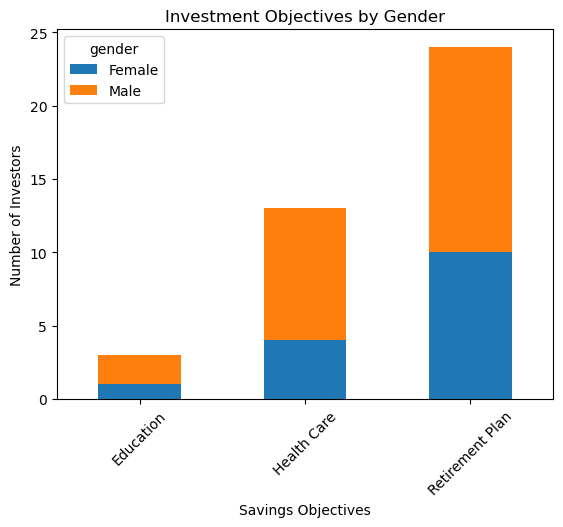

In [16]:
objectives_gender = df.groupBy("gender", "What are your savings objectives?").count().toPandas()

# Pivoting for stacked bar chart
objectives_pivot = objectives_gender.pivot(index='What are your savings objectives?', columns='gender', values='count').fillna(0)

# Plotting
objectives_pivot.plot(kind='bar', stacked=True)
plt.title('Investment Objectives by Gender')
plt.ylabel('Number of Investors')
plt.xlabel('Savings Objectives')
plt.xticks(rotation=45)
plt.show()

### 5. Investment Duration Box Plot
Description: Visualize the distribution of investment durations across different avenues.
we can compare the duration of investments across various categories.

StatementMeta(SPARK1, 0, 22, Finished, Available, Finished)

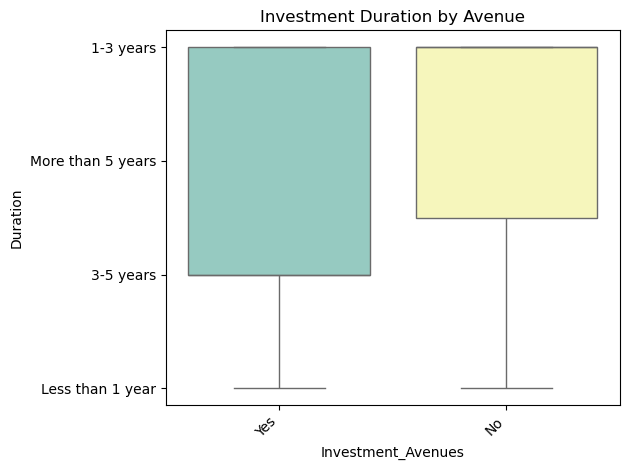

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Investment_Avenues', y='Duration', data=df.toPandas(), hue='Investment_Avenues', palette='Set3', legend=False)
plt.title('Investment Duration by Avenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 6. Investment Monitoring Preferences Bar Chart
Description: Visualize how investors prefer to monitor their investments.
Like, identify the common methods investors use to keep track of their investments.

In [54]:
import pandas as pd
import plotly.graph_objects as go

# Corrected sample DataFrame creation with same length for each column
data = {
    'Investment_Avenues': ['Gold', 'Gold', 'Government_Bonds', 'Government_Bonds', 'Mutual_Funds', 'Mutual_Funds', 'Equity_Market', 'Equity_Market', 'PPF', 'PPF'],
    'Gender': ['Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female'],
    'Preference': [70, 60, 40, 50, 80, 30, 90, 20, 10, 40]
}

# Create DataFrame
df = pd.DataFrame(data)

# Define unique categories
investment_avenues = df['Investment_Avenues'].unique()
genders = df['Gender'].unique()

# Prepare data for the stacked bar plot
bars = []
for avenue in investment_avenues:
    for gender in genders:
        filtered_values = df[(df['Investment_Avenues'] == avenue) & (df['Gender'] == gender)]['Preference'].values
        value = filtered_values[0] if filtered_values.size > 0 else 0  # default to 0 if no data
        bars.append(go.Bar(
            x=[avenue],
            y=[value],
            name=gender,
            text=f'{gender}: {value}',
            hoverinfo='text'
        ))

# Create the figure for the stacked bar chart
fig = go.Figure(data=bars)

# Update layout for better visualization
fig.update_layout(
    barmode='stack',
    title='Preference by Investment Avenue and Gender',
    xaxis_title='Investment Avenues',
    yaxis_title='Preference',
    legend_title='Gender',
    template='plotly_white'
)

# Show the figure
fig.show()

StatementMeta(SPARK1, 2, 6, Finished, Available, Finished)

###  Visualize the reasons for investment choices in a Radial Bar Chart / Polar Chart
Description: This chart type can help visualize the reasons for investment choices in a circular layout, which can be visually engaging.
Particularly effective when you have a smaller number of categories to represent the reasons.

StatementMeta(SPARK1, 1, 5, Finished, Available, Finished)

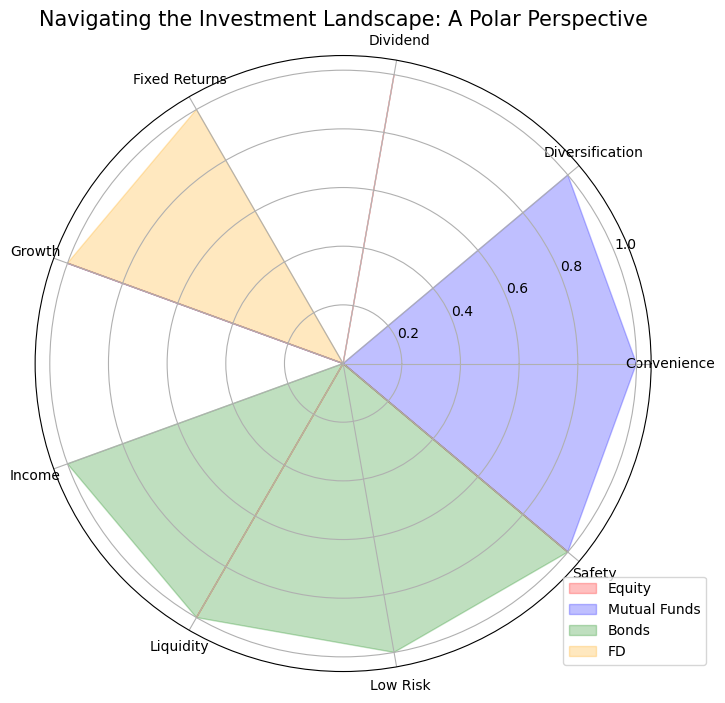

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Example DataFrame creation with equal lengths
data = {
    "Reason_Equity": ["Growth", "Safety", "Dividend", "Liquidity"],
    "Reason_Mutual": ["Convenience", "Diversification", "Growth", "Safety"],
    "Reason_Bonds": ["Safety", "Income", "Low Risk", "Liquidity"],
    "Reason_FD": ["Safety", "Fixed Returns", "Liquidity", "Growth"]
}
df = pd.DataFrame(data)

# Count occurrences of each reason for each investment type
equity_reasons = df['Reason_Equity'].value_counts()
mutual_reasons = df['Reason_Mutual'].value_counts()
bonds_reasons = df['Reason_Bonds'].value_counts()
fd_reasons = df['Reason_FD'].value_counts()

# Create a combined DataFrame for plotting
combined_df = pd.DataFrame({
    'Reason': equity_reasons.index.union(mutual_reasons.index).union(bonds_reasons.index).union(fd_reasons.index),
    'Equity': equity_reasons.reindex(equity_reasons.index.union(mutual_reasons.index).union(bonds_reasons.index).union(fd_reasons.index), fill_value=0),
    'Mutual Funds': mutual_reasons.reindex(equity_reasons.index.union(mutual_reasons.index).union(bonds_reasons.index).union(fd_reasons.index), fill_value=0),
    'Bonds': bonds_reasons.reindex(equity_reasons.index.union(mutual_reasons.index).union(bonds_reasons.index).union(fd_reasons.index), fill_value=0),
    'FD': fd_reasons.reindex(equity_reasons.index.union(mutual_reasons.index).union(bonds_reasons.index).union(fd_reasons.index), fill_value=0),
}).fillna(0)

# Reset index for plotting
combined_df.reset_index(drop=True, inplace=True)

# Prepare data for polar plot
values_equity = combined_df['Equity'].values
values_mutual = combined_df['Mutual Funds'].values
values_bonds = combined_df['Bonds'].values
values_fd = combined_df['FD'].values

# Create polar coordinates
N = len(combined_df['Reason'])
angles = [n / float(N) * 2 * np.pi for n in range(N)]
values_equity = np.concatenate((values_equity, [values_equity[0]]))
values_mutual = np.concatenate((values_mutual, [values_mutual[0]]))
values_bonds = np.concatenate((values_bonds, [values_bonds[0]]))
values_fd = np.concatenate((values_fd, [values_fd[0]]))
angles += angles[:1]

# Plotting
plt.figure(figsize=(10, 8))
ax = plt.subplot(111, polar=True)

# Plot each reason
ax.fill(angles, values_equity, color='red', alpha=0.25, label='Equity')
ax.fill(angles, values_mutual, color='blue', alpha=0.25, label='Mutual Funds')
ax.fill(angles, values_bonds, color='green', alpha=0.25, label='Bonds')
ax.fill(angles, values_fd, color='orange', alpha=0.25, label='FD')

# Set the same angle for each reason
plt.xticks(angles[:-1], combined_df['Reason'], color='black', size=10)

# Title and legend
plt.title('Navigating the Investment Landscape: A Polar Perspective', size=15)
plt.legend(loc='lower right', bbox_to_anchor=(1.1, 0), fontsize=10)

# Show Plot
plt.show()

In [ ]:
pip install plotly

In [47]:
import pandas as pd

# Example dataset: Date, Open, High, Low, Close
data = {
    'Date': ['2023-01-01', '2023-01-02', '2023-01-03', 
             '2023-01-04', '2023-01-05'],
    'Open': [100, 102, 101, 105, 104],
    'High': [105, 108, 106, 110, 107],
    'Low': [99, 100, 100, 104, 103],
    'Close': [102, 107, 105, 108, 106]
}

df = pd.DataFrame(data)
df['Date'] = pd.to_datetime(df['Date'])  # Convert 'Date' to datetime

import plotly.graph_objects as go

# Create the candlestick chart
fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                                       open=df['Open'],
                                       high=df['High'],
                                       low=df['Low'],
                                       close=df['Close'],
                                       name='Candlestick Chart')])

# Update layout for better visualization
fig.update_layout(title='Candlestick Chart of Daily Price Movements',
                  xaxis_title='Date',
                  yaxis_title='Price',
                  xaxis_rangeslider_visible=False)  # Hide the range slider if you don't need it


fig.show()

StatementMeta(SPARK1, 1, 9, Finished, Available, Finished)